# G1 Data
## 1.1 Handling Structured Data in Digital Engineering

Ensure you are familiar with the foundational concepts from the Yellow Belt Data Module before proceeding. In this module, we will work with a manufacturing dataset to develop practical skills in three key areas: data loading and exploration, data cleaning, and outlier detection and handling. We will use Python for examples, but non-coders will still be able to follow along.

- **Data Loading and Exploration:** Efficiently importing and examining structured datasets to uncover patterns and initial insights.
- **Data Cleaning:** Addressing missing values, ensuring consistency, and preparing the dataset for robust analysis.
- **Outlier Detection and Handling:** Identifying anomalies and making data-driven decisions on their treatment.

In this example dataset, we aim to explore and understand the factors influencing the manufacturing process. By examining various variables such as temperature, rotational speed, torque, and tool wear, along with the outcome (target) and failure types, we can identify patterns and relationships that may contribute to product failures.

### <font color = '#646464'> 1.1.1 Loading the Dataset </font>

In Python, you need to import libraries, which are like tools that help you perform specific tasks. To start, we will import the `pandas` library, which is essential for working with and analyzing data. Next, we load our dataset from a CSV file using the `pandas.read_csv()` function. This step requires specifying the file's location, which in this case is within the `Module 1 Content` folder.

If you want to see the code for this step, you can click on the "view" symbol to reveal it. Clicking it again will hide the code. Each cell in this module has this option.

Once the dataset is loaded, we use `df.head()` to preview the first few rows. This gives us a quick look at the data, showing the column types and values, so we can confirm that the data has loaded correctly and get an initial understanding of its structure.

<center>
  <img src="Module 1 Content/extruderDetails.png" alt="Quantitative vs Qualitative Data" width="500"/>
</center>

**Data Description**

1. **UDI**: Unique identifier for each record.
2. **Product ID**: Identifier for the product being manufactured.
3. **Type**: The type or category of the product.
4. **Air temperature [K]**: The air temperature in Kelvin during the manufacturing process.
5. **Process temperature [K]**: The process temperature in Kelvin during the manufacturing process.
6. **Rotational speed [rpm]**: The rotational speed of the machinery in revolutions per minute.
7. **Torque [Nm]**: The torque exerted by the machinery in Newton meters.
8. **Tool wear [min]**: The tool wear time in minutes.
9. **Target**: The target variable indicating the outcome or result of the manufacturing process.
10. **Failure Type**: The type of failure observed, if any.

In [26]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Module 1 Content/predictive_maintenance.csv')

# View Dataset
df.head(6)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,2,L47181,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,3,L47182,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,4,L47183,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,5,L47184,L,298.2,308.7,1408.0,40.0,NaN,0,No Failure
5,6,M14865,M,298.1,308.6,1425.0,41.9,11.0,0,No Failure


### <font color = '#646464'> 1.1.2 Inspecting Challenges in the Dataset* </font>
Once the data is loaded, it's crucial to inspect it for any common issues that might affect the analysis. 
As we discussed in the Yellow Belt Data Module, this includes checking for missing values, outliers, and incorrect data types. 
In practice, we use `df.info()` to get a concise summary of the dataframe, including the number of non-null entries and data type of each column. If we have less values in a variable than the total entries, it means some were missing.

In [5]:
# Inspect data for common issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      9481 non-null   float64
 4   Process temperature [K]  9685 non-null   float64
 5   Rotational speed [rpm]   9615 non-null   float64
 6   Torque [Nm]              9664 non-null   float64
 7   Tool wear [min]          9688 non-null   float64
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 781.4+ KB


The dataset inspection using `df.info()` reveals missing values in several operational parameters such as 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', and 'Tool wear [min]'. These features do not have values for each of the 10000 samples. This is not uncommon in manufacturing datasets, where such issues can occur due to several factors:

- **Sensor Malfunctions:** Critical sensor failures or maintenance lapses can prevent accurate data logging.
- **Data Transmission Errors:** Issues in data transmission can lead to incomplete records, especially in environments with electronic interferences.
- **Operational Disruptions:** Adjustments in production processes or machine downtimes often result in data capture gaps.

**Methods to Handle Missing Data:**

- **Imputation:** Filling in missing data with estimated values, like the average or median of the column.
  
- **Removal:** Removing rows with missing data when the amount of missing information is small and doesn't affect the analysis.

- **Flagging:** Marking missing values so they can be identified during analysis without changing the dataset.

### <font color = '#646464'> 1.1.3 Generating Summary Statistics </font>

In data analysis, generating summary statistics is a key step to understanding the dataset's central tendency, dispersion, and overall distribution. Summary statistics offer a concise way to summarize the essential characteristics of numerical data, and they are foundational in exploratory data analysis (EDA).

- **Central Tendency**: This refers to the measures that represent the center or typical value of a dataset. The most common measures are:
  - **Mean**: The average value of the data, calculated as the sum of all data points divided by the number of data points.
  - **Median**: The middle value when the data is sorted in ascending or descending order. It is less sensitive to outliers than the mean.
  - **Mode**: The most frequently occurring value in the dataset.

<center>
  <img src="Module 1 Content/meanmedian.png" alt="Quantitative vs Qualitative Data" width="500"/>
</center>

- **Dispersion**: This refers to the spread or variability in the dataset. Common measures include:
  - **Standard Deviation**: This measures how much individual data points differ from the mean. A higher standard deviation indicates that the data is more spread out.
  - **Variance**: The square of the standard deviation, representing the average of the squared differences from the mean.
  - **Range**: The difference between the maximum and minimum values in the dataset.

<br>

- **Shape of Distribution**: This refers to how the data is distributed across values. Commonly assessed through:
  - **Skewness**: A measure of the asymmetry of the data distribution. Positive skew indicates that the data’s tail is skewed to the right, while negative skew indicates a left skew.
  - **Kurtosis**: A measure of the "tailedness" of the data distribution, showing how outliers or extreme values are distributed.

To further understand the dataset, we generate summary statistics which provide insights into the central tendency,
dispersion, and shape of the dataset’s distribution. We use `df.describe()` which includes mean, standard deviation, minimum, and maximum values for numerical columns.



In [7]:
# Generate summary statistics
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,9481.000000,9685.000000,9615.000000,9664.000000,9688.000000,10000.000000
mean,5000.50000,300.005390,310.000299,1539.410088,39.981281,107.979356,0.033900
std,2886.89568,2.003227,1.485337,179.877975,9.972205,63.656004,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1504.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1613.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


The dataset's descriptive statistics reveal key insights into the manufacturing process:

- **Temperature Stability**: Look at the values of air temperature (ranging from 295.3 K to 304.5 K) and process temperature (ranging from 305.7 K to 313.8 K). Since the standard deviation for both is low (2.0 K for air temperature and 1.5 K for process temperature), it indicates that temperature variability is minimal. This shows that the environment is well-controlled, which is essential for maintaining consistency and quality in the manufacturing process.
  
- **Rotational Speed Variance**: The range of rotational speeds (from 1168 rpm to 2886 rpm) and a relatively higher standard deviation (179.88) suggest that there is a considerable amount of variability in the rotational speeds. This could indicate either operational adjustments or different machine settings used during production.

- **Torque Variability**: Torque values range from 3.8 Nm to 76.6 Nm, with a standard deviation of 9.97. This significant variability indicates that torque fluctuates considerably, likely due to varying operational demands or changing material conditions during production.

- **Tool Wear Range**: Tool wear shows a wide range, from 0 to 253 minutes, with a high standard deviation (63.66). This suggests that the amount of tool wear varies significantly, possibly due to differences in machine usage intensity or maintenance practices.


## 1.2 Data Visualization

### <font color = '#646464'> 1.2.1 Input Feature Data Visualization </font>
Visualizing data helps in identifying relationships between variables, patterns, and potential outliers.

#### Importance of Data Visualization

- **Identifying Relationships**: Scatter plots and other visualizations can help reveal relationships between variables, such as linear or non-linear correlations. For example, if two variables show a positive or negative trend when plotted, this can indicate a potential relationship.
  
- **Pattern Recognition**: Visualizations allow us to recognize patterns, clusters, or trends that might not be immediately apparent from raw data alone. For instance, scatter plots can highlight clusters of data points or identify outliers, which may indicate anomalies or errors.

- **Outlier Detection**: By plotting data points, outliers (values that fall outside the general distribution) become immediately visible. These outliers may indicate measurement errors, rare events, or special cases that need further investigation.

Here, we'll plot `Air temperature [K]` against `Process temperature [K]` to see how these temperatures relate in the manufacturing process. We will use `matplotlib` for plotting, which provides a straightforward way to create scatter plots.

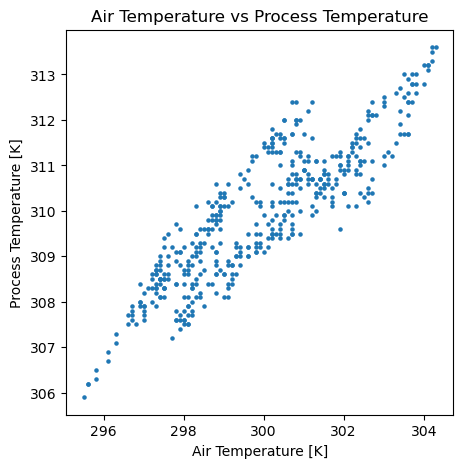

In [3]:
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize = (5,5))
plt.scatter(df['Air temperature [K]'].iloc[::20], df['Process temperature [K]'].iloc[::20], s = 5)
plt.title('Air Temperature vs Process Temperature')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Process Temperature [K]')
plt.show()

<font color = 'blue'>The plot show direct positive correlation between the Air and Process Temperatures.

A histogram is a graphical representation of the distribution of a dataset, showing the frequency of data points within specific ranges. It allows us to visually assess the shape of the data, such as whether it is symmetric, skewed, or multimodal. By observing the spread and concentration of data within the bins, we can gauge the variability and identify any outliers. In the context of the air temperature dataset, the histogram helps to understand how temperature values are distributed, whether there is significant variation, and if the data follows a particular trend or pattern.


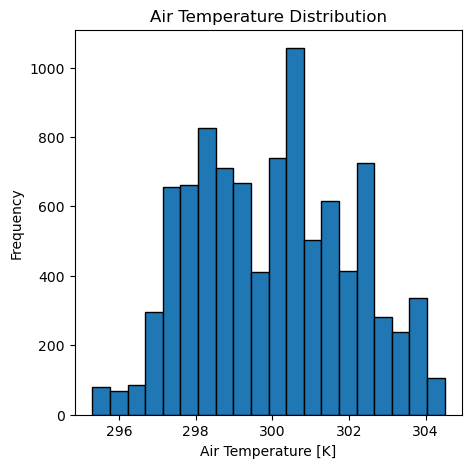

In [4]:
import matplotlib.pyplot as plt
# Plotting histogram for Air Temperature [K]
plt.figure(figsize = (5,5))
plt.hist(df['Air temperature [K]'], bins=20, edgecolor='black')
plt.title('Air Temperature Distribution')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Frequency')
plt.show()

A box plot provides a summary of a dataset's distribution, highlighting key statistics such as the median, quartiles, and potential outliers. It visually represents the spread of the data and helps to identify any extreme values or outliers. The box shows the interquartile range (IQR), where the middle 50% of the data lies, while the line inside the box represents the median value. Any data points outside the "whiskers" (the range within 1.5 times the IQR) are considered outliers. In the case of the rotational speed dataset, the box plot reveals the central tendency of the data, the spread, and any extreme values, allowing for a clearer understanding of the variability in machine speed.

<center>
  <img src="Module 1 Content/boxplot.png" alt="Quantitative vs Qualitative Data" width="300"/>
</center>


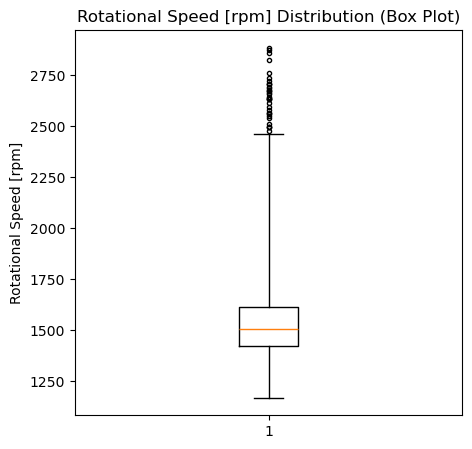

In [22]:
import matplotlib.pyplot as plt
# Box plot for Air Temperature [K] to detect outliers
plt.figure(figsize = (5,5))
plt.boxplot(df['Rotational speed [rpm]'].dropna(), 
            flierprops=dict(marker='o', color='red', markersize=3), 
            whis=4.5)  # Change whis value (default is 1.5, try something smaller or larger)
plt.title('Rotational Speed [rpm] Distribution (Box Plot)')  # Title
plt.ylabel('Rotational Speed [rpm]')  # Y-axis label
plt.show()

### <font color = '#646464'> 1.2.2 Corresponding Output: Visualizing Failure Types </font>

Understanding the distribution of failure types is crucial for identifying common issues and prioritizing maintenance efforts. A bar plot is an effective way to visualize the counts of different failure types in the dataset. This visualization helps in quickly identifying the most frequent types of failures and making informed decisions for improving the manufacturing process.

We will use `matplotlib` to create the bar plot, which provides a clear representation of the failure type counts.


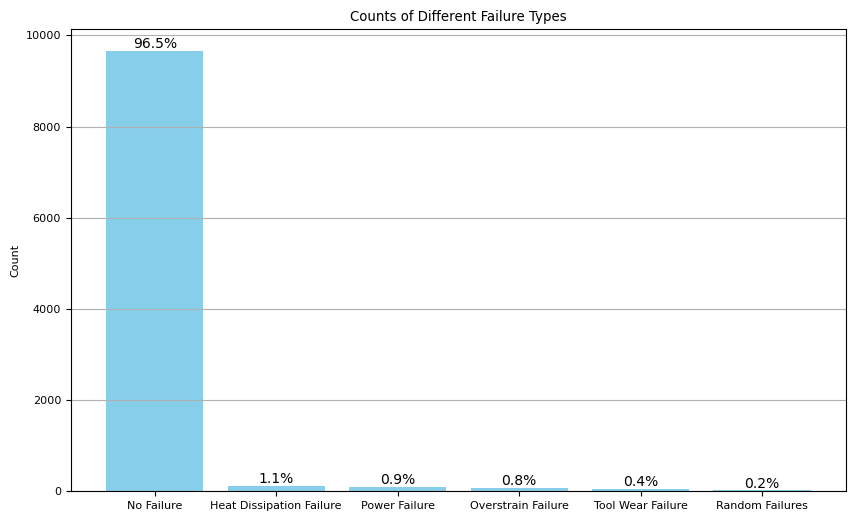

In [24]:
import matplotlib.pyplot as plt

# Set global font properties for all matplotlib plots
plt.rcParams['font.size'] = 8  # Set a default smaller font size


# Calculate the counts of each failure type
failure_counts = df['Failure Type'].value_counts()

# Calculate the percentage for each failure type
failure_percentages = (failure_counts / failure_counts.sum()) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(failure_counts.index, failure_counts, color='skyblue')

# Add percentage labels on top of the bars
for bar, percentage in zip(bars, failure_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Counts of Different Failure Types')
# plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

## 1.3 Data Preprocessing

### <font color = '#646464'> 1.3.1 Handling Missing Data </font>

Handling missing data is crucial in ensuring the quality and reliability of analyses. We will explore two common methods:

1. **Dropping missing data**: This approach involves removing rows or columns that contain missing values, which is straightforward but may result in loss of valuable data if not used carefully.
2. **Filling missing data**: This method involves replacing missing values with statistically relevant figures (mean, median, or mode) or using methods like forward/backward filling, which are particularly useful in time-series data.

Both techniques help in maintaining the integrity of the dataset for robust analysis.

Option 1: Delete Rows with Missing Data

In [27]:
# Option 1: Delete rows with missing data

# Drop rows with any missing values
drop_df = df.dropna()

# We inspect the data again
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8272 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      8272 non-null   int64  
 1   Product ID               8272 non-null   object 
 2   Type                     8272 non-null   object 
 3   Air temperature [K]      8272 non-null   float64
 4   Process temperature [K]  8272 non-null   float64
 5   Rotational speed [rpm]   8272 non-null   float64
 6   Torque [Nm]              8272 non-null   float64
 7   Tool wear [min]          8272 non-null   float64
 8   Target                   8272 non-null   int64  
 9   Failure Type             8272 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 710.9+ KB


Option 2: Fill Missing Data

1. **Fill Numerical Data with Mean**: Missing values in numerical columns are replaced with the average (mean) of the column. This ensures the numbers remain consistent and balanced.

2. **Fill Categorical Data with Mode**: Missing values in categorical columns are replaced with the most frequent value (mode). This keeps the categories representative of the data.

#### Steps:

- Separate the numerical and categorical columns.
- Fill numerical columns with their mean values.
- Fill categorical columns with their mode values.
- Combine the processed columns back into a single dataset.

This approach ensures the dataset is complete and ready for analysis while maintaining its structure.


In [29]:
import pandas as pd

# Fill numerical columns with mean
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_filled_numeric = df_numeric.fillna(df_numeric.mean())

# Fill categorical columns with mode
df_categorical = df.select_dtypes(include=['object'])
df_filled_categorical = df_categorical.apply(lambda x: x.fillna(x.mode()[0]))

# Combine the filled numerical and categorical DataFrames
df_filled = pd.concat([df_filled_numeric, df_filled_categorical], axis=1)

df_filled.info()
data = df_filled.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  float64
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  float64
 6   Target                   10000 non-null  int64  
 7   Product ID               10000 non-null  object 
 8   Type                     10000 non-null  object 
 9   Failure Type             10000 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 781.4+ KB


### <font color = '#646464'> 1.3.2 Encoding Techniques for Categorical Data </font>

Categorical data often needs to be converted into a numerical format for analysis and machine learning tasks. Many algorithms require numerical input, and raw categorical data may not provide sufficient insights or be suitable for mathematical operations. Below are several encoding techniques used to convert categorical data into numerical formats:

#### <font color = '#646464'> 1.3.2.1 One-Hot Encoding </font>
One-hot encoding represents each category as a binary column. If a category is present in a record, the corresponding column is marked as `1`, otherwise `0`. This method is useful for categorical variables with no ordinal relationship.

##### **Before One-Hot Encoding**

| Item             | Category      |
|------------------|---------------|
| Laptop           | Electronics   |
| Chair            | Furniture     |
| T-shirt          | Clothing      |
| Fridge           | Appliances    |
| Washing Machine  | Appliances    |
| Desk             | Furniture     |
| Jacket           | Clothing      |
| Microwave        | Appliances    |
| Sofa             | Furniture     |
| Shoes            | Clothing      |

##### **After One-Hot Encoding**

| Item             | Electronics | Furniture | Clothing | Appliances |
|------------------|-------------|-----------|----------|------------|
| Laptop           | 1           | 0         | 0        | 0          |
| Chair            | 0           | 1         | 0        | 0          |
| T-shirt          | 0           | 0         | 1        | 0          |
| Fridge           | 0           | 0         | 0        | 1          |
| Washing Machine  | 0           | 0         | 0        | 1          |
| Desk             | 0           | 1         | 0        | 0          |
| Jacket           | 0           | 0         | 1        | 0          |
| Microwave        | 0           | 0         | 0        | 1          |
| Sofa             | 0           | 1         | 0        | 0          |
| Shoes            | 0           | 0         | 1        | 0          |


#### <font color = '#646464'> 1.3.2.2 Label Encoding </font>
Label encoding assigns a unique numerical value to each category. While simple and efficient for ordinal data, it may introduce unintended ordinal relationships in nominal data.

##### **Before Label Encoding**

| Item             | Category      |
|------------------|---------------|
| Laptop           | Electronics   |
| Chair            | Furniture     |
| T-shirt          | Clothing      |
| Fridge           | Appliances    |
| Washing Machine  | Appliances    |
| Desk             | Furniture     |
| Jacket           | Clothing      |
| Microwave        | Appliances    |
| Sofa             | Furniture     |
| Shoes            | Clothing      |

##### **After Label Encoding**

| Item             | Category      | Category (Encoded) |
|------------------|---------------|--------------------|
| Laptop           | Electronics   | 0                  |
| Chair            | Furniture     | 1                  |
| T-shirt          | Clothing      | 2                  |
| Fridge           | Appliances    | 3                  |
| Washing Machine  | Appliances    | 3                  |
| Desk             | Furniture     | 1                  |
| Jacket           | Clothing      | 2                  |
| Microwave        | Appliances    | 3                  |
| Sofa             | Furniture     | 1                  |
| Shoes            | Clothing      | 2                  |

#### <font color = '#646464'> 1.3.2.3 Frequency Encoding </font>
Frequency encoding replaces categories with their frequency of occurrence in the dataset. This method is useful when the frequency of categories carries important information.

##### **Before Frequency Encoding**  

| Failure Type              |
|---------------------------|
| None                      |
| Heat Dissipation Failure  |
| Power Failure             |
| None                      |
| Power Failure             |
| Heat Dissipation Failure  |

##### **After Frequency Encoding**  

| Failure Type              | Frequency Encoding |
|---------------------------|--------------------|
| None                      | 0.50               |
| Heat Dissipation Failure  | 0.30               |
| Power Failure             | 0.20               |
| None                      | 0.50               |
| Power Failure             | 0.20               |
| Heat Dissipation Failure  | 0.30               |



#### Choosing the Right Technique
Each encoding technique has its own advantages and is suitable for different scenarios. It is important to select the appropriate method based on:
- The nature of the categorical data (nominal or ordinal).
- The requirements of the analysis or machine learning model.

By effectively converting categorical data into numerical formats, you can perform more meaningful analyses and enhance the performance of your models.

<font color='#0024CC'>
    
 **Back to Example**, we applied encoding to the categorical data in the `Failure Type` and `Type` columns:
</font>
1. **Failure Type**: We used **Label Encoding** to convert the categorical values into numerical format. Specifically, the new column `No Failure Encoded` assigns:
   - `1` when there is "No Failure."
   - `0` for any type of failure.

2. **Type**: We used **One-Hot Encoding** to create binary columns for each category in the `Type` column, representing the presence (`1`) or absence (`0`) of each type.

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for Failure Type
label_encoder = LabelEncoder()
data['No Failure Encoded'] = label_encoder.fit_transform(data['Failure Type'])

# One-Hot Encoding for Type
data_encoded = pd.get_dummies(data, columns=['Type'], prefix='Type')

# Display the updated DataFrame
data_encoded

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Product ID,Failure Type,No Failure Encoded,Type_H,Type_L,Type_M
0,1,298.10000,308.6,1551.000000,42.800000,0.000000,0,M14860,No Failure,1,False,False,True
1,2,298.20000,308.7,1408.000000,46.300000,3.000000,0,L47181,No Failure,1,False,True,False
2,3,298.10000,308.5,1498.000000,49.400000,5.000000,0,L47182,No Failure,1,False,True,False
3,4,298.20000,308.6,1433.000000,39.500000,7.000000,0,L47183,No Failure,1,False,True,False
4,5,298.20000,308.7,1408.000000,40.000000,107.979356,0,L47184,No Failure,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,298.80000,308.4,1604.000000,29.500000,14.000000,0,M24855,No Failure,1,False,False,True
9996,9997,298.90000,308.4,1632.000000,31.800000,17.000000,0,H39410,No Failure,1,True,False,False
9997,9998,300.00539,308.6,1645.000000,39.981281,22.000000,0,M24857,No Failure,1,False,False,True
9998,9999,299.00000,308.7,1539.410088,48.500000,25.000000,0,H39412,No Failure,1,True,False,False


To remove unnecessary columns such as `UDI` (a unique identifier) and `Failure Type` (already encoded as `No Failure Encoded`), we can use the `drop` function from pandas. Here's the code:

In [9]:
# Dropping unnecessary columns
columns_to_drop = ['UDI', 'Failure Type']
data_encoded_cleaned = data_encoded.drop(columns=columns_to_drop)

# Display the updated DataFrame
data_encoded_cleaned

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Product ID,No Failure Encoded,Type_H,Type_L,Type_M
0,298.10000,308.6,1551.000000,42.800000,0.000000,0,M14860,1,False,False,True
1,298.20000,308.7,1408.000000,46.300000,3.000000,0,L47181,1,False,True,False
2,298.10000,308.5,1498.000000,49.400000,5.000000,0,L47182,1,False,True,False
3,298.20000,308.6,1433.000000,39.500000,7.000000,0,L47183,1,False,True,False
4,298.20000,308.7,1408.000000,40.000000,107.979356,0,L47184,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.80000,308.4,1604.000000,29.500000,14.000000,0,M24855,1,False,False,True
9996,298.90000,308.4,1632.000000,31.800000,17.000000,0,H39410,1,True,False,False
9997,300.00539,308.6,1645.000000,39.981281,22.000000,0,M24857,1,False,False,True
9998,299.00000,308.7,1539.410088,48.500000,25.000000,0,H39412,1,True,False,False
